# O Objetivo desse trabalho é:

- Analisar as variantes presentes nos países da América do Sul
  
  Países: Brasil, Argentina, Uruguai, Paraguai, Chile, Equador, Venezuela, Peru, Colombia, Bolívia
  
  Obs: Alguns países estão faltando
  

- Número total de variantes
- Avaliar quais as variantes com mais aparições totais
- Avaliar o avanço dessas variantes conforme o tempo
- Qual país teve mais aparições dessas variantes
- Desafio: Se possível plotar um gráfico de mapa da América do Sul!

In [1]:
# Bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Importando Base de Dados
db = pd.read_csv(r'covid-variants.csv')
display(db)

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
0,Angola,2020-07-06,Alpha,0,0.0,3
1,Angola,2020-07-06,B.1.1.277,0,0.0,3
2,Angola,2020-07-06,B.1.1.302,0,0.0,3
3,Angola,2020-07-06,B.1.1.519,0,0.0,3
4,Angola,2020-07-06,B.1.160,0,0.0,3
...,...,...,...,...,...,...
100411,Zimbabwe,2021-11-01,Omicron,0,0.0,6
100412,Zimbabwe,2021-11-01,S:677H.Robin1,0,0.0,6
100413,Zimbabwe,2021-11-01,S:677P.Pelican,0,0.0,6
100414,Zimbabwe,2021-11-01,others,0,0.0,6


In [3]:
# Tratamento de Dados

# Avaliando as variáveis
db.info()

# Observe que a coluna 'date' não está sendo interpretada como data, mas sim como 'object'
db.date = pd.to_datetime(db.date)
print('-'*60)
db.info()

# Veja que agora todas as colunas estão sendo interpretadas corretamente

# Não há colunas nulas, a partir desse ponto não é necessário fazer mais nenhuma correção

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100416 entries, 0 to 100415
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   location             100416 non-null  object 
 1   date                 100416 non-null  object 
 2   variant              100416 non-null  object 
 3   num_sequences        100416 non-null  int64  
 4   perc_sequences       100416 non-null  float64
 5   num_sequences_total  100416 non-null  int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 4.6+ MB
------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100416 entries, 0 to 100415
Data columns (total 6 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   location             100416 non-null  object        
 1   date                 100416 non-null  datetime64[ns]
 2   variant     

In [31]:
# Vamos analisar quais variantes e quais países estão disponíveis

df_variantes = db.groupby(['variant']).sum().sort_values(by = 'num_sequences', ascending = False)
df_paises = db.groupby(['location']).sum()

# Observe que as variantes Delta e Alpha são as mais relevantes

display(df_variantes)
display(df_paises)

# Para visualisar mais facilmente os nomes dos países e variantes
paises_lt = list(set(db['location']))
paises_lt.sort()
print(paises_lt)

variant_lt = list(set(db['variant']))
variant_lt.sort()
print(variant_lt)

,num_sequences,perc_sequences,num_sequences_total
variant,,,
Delta,3834100,122263.17,6316093
Alpha,1132595,59642.42,6316093
non_who,931098,199595.71,6316093
others,642603,170197.70,6316093
B.1.177,170457,11681.60,6316093
Omicron,115538,5670.92,6316093
Gamma,115156,8793.61,6316093
Epsilon,66127,737.89,6316093
Iota,42905,908.62,6316093


,num_sequences,perc_sequences,num_sequences_total
location,,,
Angola,1325,3507.65,25320
Argentina,10689,6837.93,201864
Aruba,3302,3002.21,72000
Australia,62668,6502.24,1132776
Austria,14627,6356.05,301920
...,...,...,...
United States,2420758,6738.15,49960248
Uruguay,1189,4592.69,16368
Vietnam,1811,2350.00,43320


['Angola', 'Argentina', 'Aruba', 'Australia', 'Austria', 'Bahrain', 'Bangladesh', 'Belgium', 'Belize', 'Benin', 'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Cambodia', 'Cameroon', 'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Curacao', 'Cyprus', 'Czechia', 'Denmark', 'Djibouti', 'Dominican Republic', 'Ecuador', 'Egypt', 'Estonia', 'Ethiopia', 'Fiji', 'Finland', 'France', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Guatemala', 'Hong Kong', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kosovo', 'Kuwait', 'Latvia', 'Lebanon', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Malta', 'Mauritius', 'Mexico', 'Moldova', 'Monaco', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique', 'Nepal', 'Netherlands', 'New Zealand', 'Nigeria', 'North Macedonia', 'Norway', 'Oman', 'Pakistan', 'Papua New Guinea', 'Paraguay', '

In [5]:
# Conseguindo uma lista das variantes de uma outra forma
db.variant.unique()

array(['Alpha', 'B.1.1.277', 'B.1.1.302', 'B.1.1.519', 'B.1.160',
       'B.1.177', 'B.1.221', 'B.1.258', 'B.1.367', 'B.1.620', 'Beta',
       'Delta', 'Epsilon', 'Eta', 'Gamma', 'Iota', 'Kappa', 'Lambda',
       'Mu', 'Omicron', 'S:677H.Robin1', 'S:677P.Pelican', 'others',
       'non_who'], dtype=object)

In [6]:
# Descobrindo o número de países disponível e o número de variantes disponível

dados_paises = db.groupby('date')['location'].nunique()
dados_variantes = db.groupby('date')['variant'].nunique()

display(dados_paises, dados_variantes)

# Observe que não há dados de todos os países em todas as datas!
# Isso se deve talvez a não terem sido registrados nenhum caso nessa data específica nesses países!
# Por outro lado existem dados de todas as variantes em todas as datas!

# Número exato de variantes e países

print(f'Existem informações de {len(df_variantes)} variantes de vírus')
print(f'Existem informações de {len(df_paises)} países diferentes')


date
2020-05-11     78
2020-05-25     72
2020-06-08     78
2020-06-22     79
2020-07-06     74
2020-07-20     79
2020-08-03     77
2020-08-17     87
2020-08-31     86
2020-09-14     84
2020-09-28     84
2020-10-12     91
2020-10-26     86
2020-11-09     87
2020-11-23     95
2020-12-07     93
2020-12-21    101
2021-01-04    109
2021-01-11     99
2021-01-25    112
2021-02-08    112
2021-02-22    109
2021-03-08    110
2021-03-22    105
2021-04-05    105
2021-04-19    110
2021-05-03    110
2021-05-17    106
2021-05-31    108
2021-06-14    107
2021-06-28    107
2021-07-12    110
2021-07-26    110
2021-08-09    108
2021-08-23    101
2021-09-06    103
2021-09-20     96
2021-10-04     94
2021-10-18     91
2021-11-01     95
2021-11-15     89
2021-11-29     85
2021-12-13     86
2021-12-27     64
2022-01-05     12
Name: location, dtype: int64

date
2020-05-11    24
2020-05-25    24
2020-06-08    24
2020-06-22    24
2020-07-06    24
2020-07-20    24
2020-08-03    24
2020-08-17    24
2020-08-31    24
2020-09-14    24
2020-09-28    24
2020-10-12    24
2020-10-26    24
2020-11-09    24
2020-11-23    24
2020-12-07    24
2020-12-21    24
2021-01-04    24
2021-01-11    24
2021-01-25    24
2021-02-08    24
2021-02-22    24
2021-03-08    24
2021-03-22    24
2021-04-05    24
2021-04-19    24
2021-05-03    24
2021-05-17    24
2021-05-31    24
2021-06-14    24
2021-06-28    24
2021-07-12    24
2021-07-26    24
2021-08-09    24
2021-08-23    24
2021-09-06    24
2021-09-20    24
2021-10-04    24
2021-10-18    24
2021-11-01    24
2021-11-15    24
2021-11-29    24
2021-12-13    24
2021-12-27    24
2022-01-05    24
Name: variant, dtype: int64

Existem informações de 24 variantes de vírus
Existem informações de 121 países diferentes


# Avaliar quais países estão disponíveis

In [7]:
paises_amesul_lt = ['Brazil', 'Argentina', 'Uruguay', 'Paraguay', 'Chile', 'Ecuador', 'Venezuela', 'Peru', 'Colombia', 'Bolívia']

for pais in paises_amesul_lt:
    if pais in paises_lt:
        print(f'{pais} está na lista!')
    else:
        print(f'{pais} não está na lista!')
        paises_amesul_lt.remove(pais)
        
print(paises_amesul_lt)

# Não existem dados apenas de 2 países, Venezuela e Bolívia 

Brazil está na lista!
Argentina está na lista!
Uruguay está na lista!
Paraguay está na lista!
Chile está na lista!
Ecuador está na lista!
Venezuela não está na lista!
Colombia está na lista!
Bolívia não está na lista!
['Brazil', 'Argentina', 'Uruguay', 'Paraguay', 'Chile', 'Ecuador', 'Peru', 'Colombia']


# Filtrar nossa base de dados para avaliar apenas os países de interesse

In [8]:
# Pegar apenas os países da america do sul

dict = {'location':[],'date': [], 'variant': [], 'num_sequences': [], 'perc_sequences':[], 'num_sequences_total':[]}
amsul_df = pd.DataFrame.from_dict(dict)

for pais in paises_amesul_lt:
    df2 = db[db['location'] == pais]
    amsul_df = pd.concat([amsul_df,df2], ignore_index = True)

display(amsul_df)
amsul_df['location'].value_counts()

# Aparentemente todos os países foram filtrados corretamente
# Pareguai e Uruguais possuem menos dados
# Mas de um modo geral a base esta com quantidade de dados padronizados

,location,date,variant,num_sequences,perc_sequences,num_sequences_total
0,Brazil,2020-05-11,Alpha,0.0,0.00,311.0
1,Brazil,2020-05-11,B.1.1.277,0.0,0.00,311.0
2,Brazil,2020-05-11,B.1.1.302,0.0,0.00,311.0
3,Brazil,2020-05-11,B.1.1.519,0.0,0.00,311.0
4,Brazil,2020-05-11,B.1.160,0.0,0.00,311.0
...,...,...,...,...,...,...
7843,Colombia,2021-12-27,Omicron,37.0,34.58,107.0
7844,Colombia,2021-12-27,S:677H.Robin1,0.0,0.00,107.0
7845,Colombia,2021-12-27,S:677P.Pelican,0.0,0.00,107.0
7846,Colombia,2021-12-27,others,0.0,0.00,107.0


Brazil       1056
Peru         1056
Argentina    1056
Ecuador      1056
Colombia     1056
Chile        1056
Paraguay      936
Uruguay       576
Name: location, dtype: int64

# Análise Países

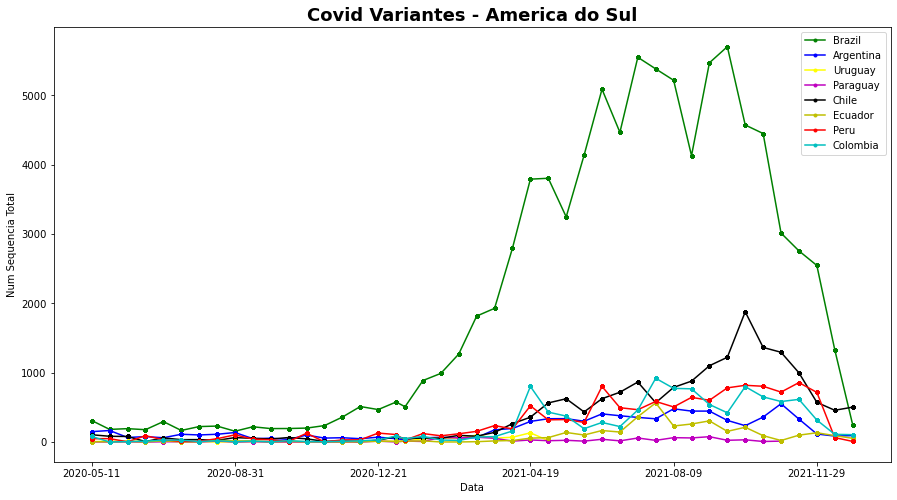

In [55]:
plt.figure(figsize=(15, 8))

plt.title('Covid Variantes - America do Sul', fontdict={'fontweight':'bold', 'fontsize': 18})

# Plot dos gráficos

cor_lt = ['g','b','yellow','m','k','y','r','c']

for i, pais in enumerate(paises_amesul_lt):
    plt.plot(amsul_df[amsul_df['location'] == pais]['date'],
             amsul_df[amsul_df['location'] == pais]['num_sequences_total'],
             label = pais,
             color = cor_lt[i],
             linestyle = '-',
             marker = '.')

plt.xticks(amsul_df[amsul_df['location'] == 'Brazil']['date'][::200].tolist())

plt.xlabel('Data')
plt.ylabel('Num Sequencia Total')

plt.legend()

plt.show()

# Observando o gráfico podemos notar que o país que:
# O país que mais se destaca é o Brasil em termo de número total
# Chile apresentou uma alta expressiva entre 2021/08/09 e 2021/11/29
# Paraguai ficou com números muito baixos, provavelmente por ser um país menor ou por registros faltantes
# A maior parte dos países começou a relatar casos em maior quantidade a partir de 2021/04/19

# Análise Variantes

In [34]:
# Como visto anteriormente, as variantes delta e alpha foram as mais relevantes
# Por isso vamos focar nossa atenção nelas

# Delta
delta_df = amsul_df[amsul_df['variant']=='Delta']
delta_df = delta_df.groupby(['date']).sum()

# Alpha
alpha_df = amsul_df[amsul_df['variant']=='Alpha']
alpha_df = alpha_df.groupby(['date']).sum()

display(delta_df, alpha_df)

,num_sequences,perc_sequences,num_sequences_total
date,,,
2020-05-11,0.0,0.00,713.0
2020-05-25,0.0,0.00,506.0
2020-06-08,0.0,0.00,377.0
2020-06-22,0.0,0.00,391.0
2020-07-06,0.0,0.00,520.0
2020-07-20,0.0,0.00,374.0
2020-08-03,0.0,0.00,398.0
2020-08-17,0.0,0.00,479.0
2020-08-31,0.0,0.00,489.0


,num_sequences,perc_sequences,num_sequences_total
date,,,
2020-05-11,0.0,0.00,713.0
2020-05-25,0.0,0.00,506.0
2020-06-08,0.0,0.00,377.0
2020-06-22,0.0,0.00,391.0
2020-07-06,0.0,0.00,520.0
2020-07-20,0.0,0.00,374.0
2020-08-03,0.0,0.00,398.0
2020-08-17,0.0,0.00,479.0
2020-08-31,0.0,0.00,489.0


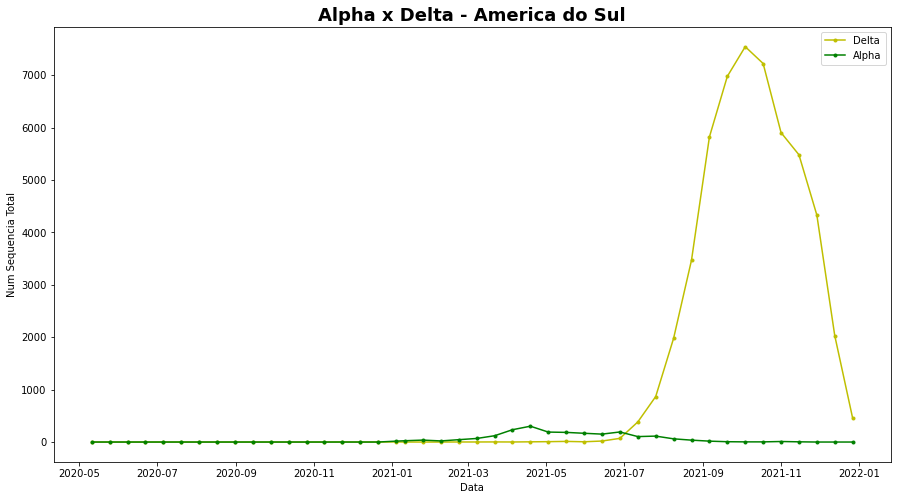

In [44]:
plt.figure(figsize=(15, 8))

plt.title('Alpha x Delta - America do Sul', fontdict={'fontweight':'bold', 'fontsize': 18})

plt.plot(list(delta_df.index),
         delta_df['num_sequences'],
         label = 'Delta',
         color = 'y',
         linestyle = '-',
         marker = '.')

plt.plot(list(alpha_df.index),
         alpha_df['num_sequences'],
         label = 'Alpha',
         color = 'g',
         linestyle = '-',
         marker = '.')

plt.xlabel('Data')
plt.ylabel('Num Sequencia Total')

plt.legend()

plt.show()

# Observando o gráfico, vemos que a variante Alpha foi muito pouco expressiva na América do Sul
# Apesar de possuir um grande impacto global

# Análise Brasil

In [53]:
brasil_df = amsul_df[amsul_df['location']=='Brazil']
brasil_variant_df = brasil_df.groupby(['variant']).sum().sort_values(by = 'num_sequences', ascending = False)
display(brasil_variant_df)

# No Brasil as variantes mais relevantes são: Gamma, Delta, Alpha e Omicron

,num_sequences,perc_sequences,num_sequences_total
variant,,,
Gamma,47252.0,1309.78,90020.0
Delta,33292.0,916.59,90020.0
non_who,8189.0,2069.87,90020.0
others,8174.0,2067.92,90020.0
Alpha,1043.0,40.83,90020.0
Omicron,189.0,61.34,90020.0
Mu,23.0,0.52,90020.0
Lambda,21.0,0.56,90020.0
Beta,10.0,0.43,90020.0


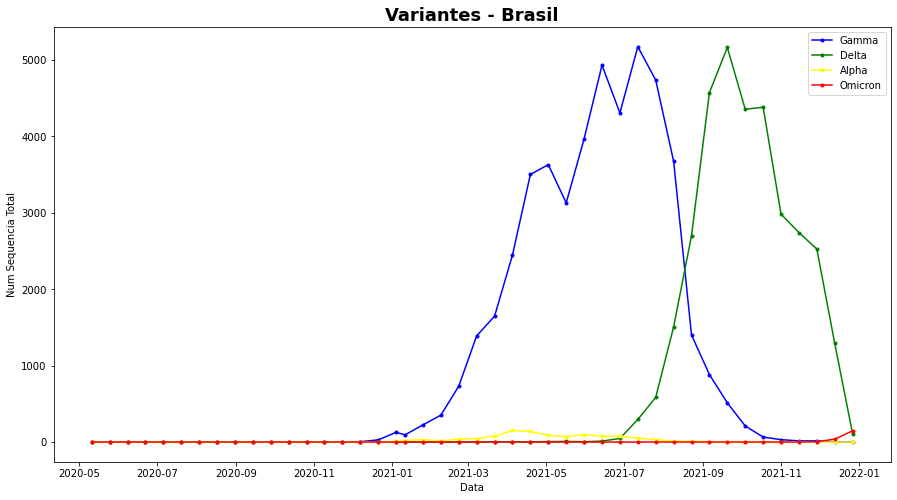

In [65]:
# Brasil foi o país com maior número de casos na América do Sul
# Vamos analisar quais variantes foram mais expressivas no país

plt.figure(figsize=(15, 8))

plt.title('Variantes - Brasil', fontdict={'fontweight':'bold', 'fontsize': 18})

variant_lt = ['Gamma', 'Delta', 'Alpha', 'Omicron']
cor_lt = ['blue','green','yellow','red']

for i, variant in enumerate(variant_lt):
    plt.plot(brasil_df[brasil_df['variant'] == variant]['date'],
             brasil_df[brasil_df['variant'] == variant]['num_sequences'],
             label = variant,
             color = cor_lt[i],
             linestyle = '-',
             marker = '.')


plt.xlabel('Data')
plt.ylabel('Num Sequencia Total')

plt.legend()

plt.show()

# É possível que as variantes Gamma e Delta tiveram grande impacto no Brasil
# Também é possível verificar que elas tiveram picos em diferentes momentos
# Gamma ficou mais ativa entre os meses 4 a 8 de 2021
# Delta ficou mais ativa entre os meses 9 a 12 de 2021